In [2]:
# Imports initiaux

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from scipy.stats import ttest_ind
from plotly.subplots import make_subplots
from matplotlib import colors
import plotly.graph_objs as go

In [3]:
df = pd.read_csv(r'data_center\train.csv')
pd.set_option('display.max_columns', None)
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range 


    battery_power - Total energy a battery can store in one time measured in mAh
    blue - Has bluetooth or not
    clock_speed - Speed at which microprocessor executes instructions
    dual_sim - Has dual sim support or not
    fc - Front Camera mega pixels
    four_g - Has 4G or not
    int_memory - Internal Memory in Gigabytes
    m_dep - Mobile Depth in cm
    mobile_wt - Weight of mobile phone
    n_cores - Number of cores of processor
    pc - Primary Camera mega pixels
    px_height - Pixel Resolution Height
    px_width - Pixel Resolution Width
    ram - Random Access Memory in Megabytes
    sc_h - Screen Height of mobile in cm
    sc_w - Screen Width of mobile in cm
    talk_time - Longest time that a single battery charge will last when you are
    three_g - Has 3G or not
    touch_screen - Has touch screen or not
    wifi - Has wifi or not
    price_range - This is the target variable with value of:
        0 (low cost)
        1 (medium cost)
        2 (high cost)
        3 (very high cost)


In [ ]:
print(df.info())
print(df.isnull().sum())

#Tout est unique

In [4]:
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

df_filtreted = df.drop(df_categorical.columns, axis=1)

df_filtreted.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


In [ ]:
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


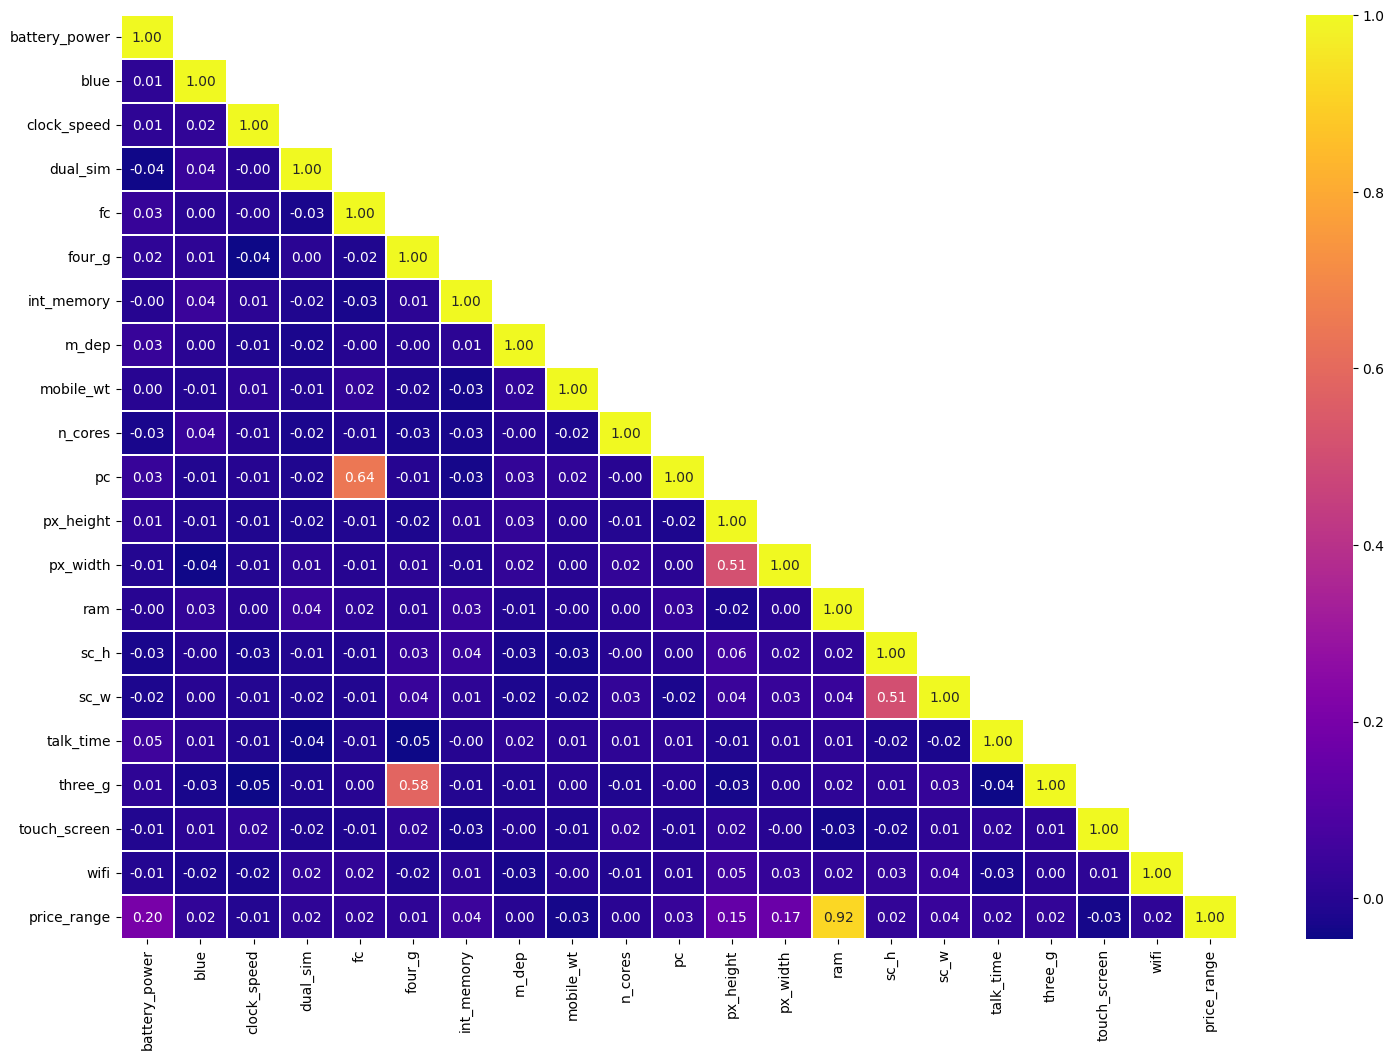

In [ ]:
# Calcul de la corélation de Spearman
target = 'price_range'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Pour retirer le haut
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap='plasma', fmt='.2f', linewidths=0.2)
plt.show()

On voit une grosse corrélation entre la ram et le prix : 0.92
Les dimmensions du portable sont corrélé entre elles
la 3G est assez corrélé à la 4G : 0.58 

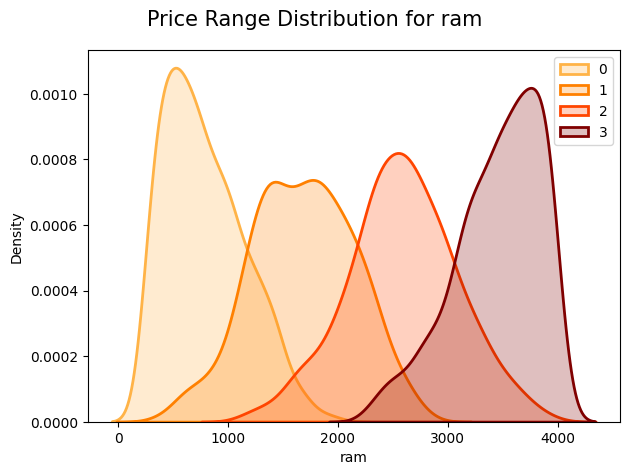

In [23]:
Num_Features = df_filtreted.columns
# Define Seaborn palette
sns.set_palette(['#ffb347', '#ff8000', '#ff4500','#800000'])
fig = plt.plot(figsize=(15,20))
sns.kdeplot(data=df[df[target]==0], x='ram', fill=True, linewidth=2, label='0')
sns.kdeplot(data=df[df[target]==1], x='ram', fill=True, linewidth=2, label='1')
sns.kdeplot(data=df[df[target]==2], x='ram', fill=True, linewidth=2, label='2')
sns.kdeplot(data=df[df[target]==3], x='ram', fill=True, linewidth=2, label='3')

plt.suptitle('Price Range Distribution for ram', fontsize=15)
plt.tight_layout()
plt.legend()
plt.show()

On voit bien la distribution des différents prix pour la Ram

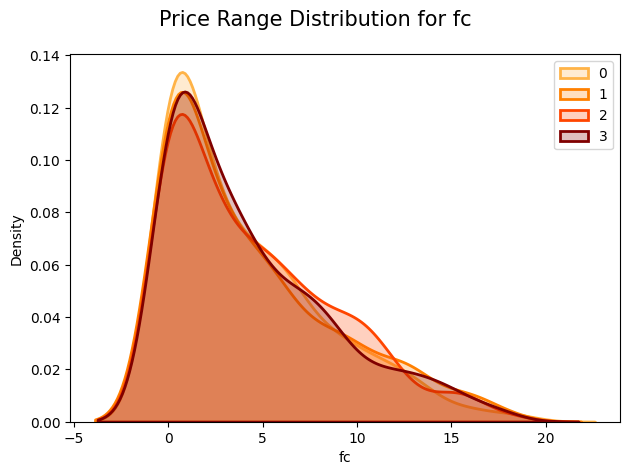

In [24]:
Num_Features = df_filtreted.columns
# Define Seaborn palette
sns.set_palette(['#ffb347', '#ff8000', '#ff4500','#800000'])
fig = plt.plot(figsize=(15,20))
sns.kdeplot(data=df[df[target]==0], x='fc', fill=True, linewidth=2, label='0')
sns.kdeplot(data=df[df[target]==1], x='fc', fill=True, linewidth=2, label='1')
sns.kdeplot(data=df[df[target]==2], x='fc', fill=True, linewidth=2, label='2')
sns.kdeplot(data=df[df[target]==3], x='fc', fill=True, linewidth=2, label='3')

plt.suptitle('Price Range Distribution for fc', fontsize=15)
plt.tight_layout()
plt.legend()
plt.show()

A défaut on voit bien que pour le fc pas de correlation